In [356]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [357]:
INITIAL_DOSEN = 3

In [358]:
class Universitas:
    total_mahasiswa = 0
    anggaran = 10000000000

    def __init__(self, nama_kampus, prodi):
        self.nama = nama_kampus
        self.prodi = prodi

    def hitung_dosen_kampus(self):
        total = 0
        for program_studi in self.prodi:
            total += program_studi.dosen
        return total
    
    def mahasiswa_lulus(self):
        for program_studi in self.prodi:
            program_studi.angkatan.pop(0)

In [359]:
class Prodi:
    def __init__(self, nama, ukt, kode):
        self.nama = nama
        self.kode = kode
        self.ukt = ukt
        self.angkatan = []
        self.dosen = 0

    def tambah_angkatan_prodi(self, angkatan):
        self.angkatan.append(angkatan)

    def hitung_mahasiswa_prodi(self):
        total = 0
        for tiap_angkatan in self.angkatan:
            total += tiap_angkatan.hitung_mahasiswa_angkatan()
        return total

In [360]:
class Angkatan:
    def __init__(self, tahun):
        self.tahun = tahun
        self.mahasiswa = []
        self.kelas = []

    def tambah_mahasiswa_angkatan(self, mahasiswa):
        self.mahasiswa.append(mahasiswa)

    def hitung_mahasiswa_angkatan(self):
        return len(self.mahasiswa)

In [361]:
class Mahasiswa:
    def __init__(self,NIM):
        self.NIM = NIM

In [362]:
class Kelas:
    def __init__(self,nama_kelas):
        self.nama_kelas = nama_kelas
        self.mahasiswa = []
    def tambah_mahasiswa_kelas(self,mahasiswa):
        self.mahasiswa.append(mahasiswa)
    def hitung_mahasiswa_kelas(self):
        return len(self.mahasiswa)

In [363]:
prodi = [Prodi("Informatika",7000000,"IF"),
         Prodi("Sistem Informasi",8000000,"SI"),
         Prodi("Teknologi Indormasi",8000000,"TI"),
         Prodi("Rekayasa Perangkat Lunak",8500000,"RPL"),
         Prodi("Sains Data",7000000,"DS")]

In [364]:
TelkomMadura = Universitas("Telkom Madura",prodi)

In [365]:
def proses_mendaftar(NIM,tahun_angkatan):
    # MEMILIH PRODI
    prodi_terpilih = random.randint(0,4)
    mahasiswa_baru = Mahasiswa(NIM)
    prodi[prodi_terpilih].angkatan[tahun_angkatan].mahasiswa.append(mahasiswa_baru)
    
    # PEMBAYARAN
    BiayaUP3 = 8000000
    BiayaSDP = 12150000
    BiayaUKT = prodi[prodi_terpilih].ukt
    Total = BiayaSDP + BiayaUKT + BiayaUP3
    return Total

In [366]:
def hitung_kebutuhan_dosen(program_studi):
    total_mahasiswa = program_studi.hitung_mahasiswa_prodi()
    kebutuhan_dosen = total_mahasiswa // 30
    program_studi.dosen = kebutuhan_dosen + INITIAL_DOSEN

In [367]:
def membuat_kelas(tahun_angkatan,tahun):
    for program_studi in prodi:
        total_mahasiswa = program_studi.angkatan[tahun_angkatan].hitung_mahasiswa_angkatan()
        total_kelas = total_mahasiswa // 30 + 1
        kode_kelas = 0

        total_kelas_counter = 0
        start = 0
        while total_kelas_counter < total_kelas and total_mahasiswa >= 0:
            program_studi.angkatan[tahun_angkatan].kelas.append(Kelas(f"{program_studi.kode}-{tahun}-{kode_kelas + 1}")) # menambahkan kelas baru
            for mahasiswa in program_studi.angkatan[tahun_angkatan].mahasiswa[start:]: # looping ke mahasiswa di angkatan tertentu
                program_studi.angkatan[tahun_angkatan].kelas[kode_kelas].mahasiswa.append(mahasiswa) # menambahkan mahasiswa ke kelas
                total_mahasiswa = total_mahasiswa - 1
                start += 1
                if program_studi.angkatan[tahun_angkatan].kelas[kode_kelas].hitung_mahasiswa_kelas() == 30: # jika mahasiswa per kelas sudah 30 maka break dan buat kelas baru
                    break
            kode_kelas += 1
            total_kelas_counter += 1
        # KEBUTUHAN DOSEN
        hitung_kebutuhan_dosen(program_studi)

In [368]:
def bayar_ukt():
    pemasukan = 0
    for program_studi in prodi:
        pemasukan += program_studi.ukt * program_studi.hitung_mahasiswa_prodi()
    return pemasukan

In [369]:
def pengeluaran_kampus(bulan):
    gaji_dosen = 7000000 * TelkomMadura.hitung_dosen_kampus()
    pengeluaran = np.random.uniform(0.7, 0.9) * (bayar_ukt() / 6 - gaji_dosen) + gaji_dosen
    if bulan == 12:
        pengeluaran += 200000000 # biaya gedung
    return pengeluaran

In [370]:
def hitung_mahasiswa(tahun_angkatan):
    total = 0
    for program_studi in prodi:
        total += program_studi.angkatan[tahun_angkatan].hitung_mahasiswa_angkatan()
    return total

In [371]:
def rekap_mahasiswa_prodi(tahun):
    mahasiswa = []
    for program_studi in prodi:
        mahasiswa.append(program_studi.angkatan[tahun].hitung_mahasiswa_angkatan())
    return mahasiswa

In [372]:
def lihat_angkatan():
    print([i.tahun for i in prodi[0].angkatan])

In [373]:
def simulasi_kampus(tahun_start,tahun_terakhir):
    angkatan = tahun_start
    growth_factor = 1.2 # kenaikan atau penurunan mahasiswa calon pendaftar
    mahasiswa = random.randint(1,100) # kemungkinan mahasiswa calon pendaftar
    nim = 1 # NIM atau ID mahasiswa
    cashflow = []
    data_mahasiswa = []
    pendaftar = 0
    # SIMULASI
    for tahun in range(tahun_terakhir - tahun_start): 
        # Membuat Angkatan Baru di Tiap Prodi
        pendaftar = 0
        for program_studi in prodi:
            program_studi.tambah_angkatan_prodi(Angkatan(tahun))
        for bulan in range(1,13):
            pemasukan = 0
            if(bulan == 2 or bulan == 9):
                pemasukan += bayar_ukt()
            # PENDAFTARAN   
            for _ in range(30): 
                if random.random() < 0.5: # Kemungkinan kenaikan calon pendaftar
                    mahasiswa +=  int(mahasiswa * random.uniform(0.05, 0.5) * growth_factor)
                else:
                    mahasiswa -= int(mahasiswa * random.uniform(0.05, 0.5))
                # Mahasiswa Mendaftar
                for _ in range(mahasiswa):
                    if hitung_mahasiswa(-1) == 700:
                        break
            
                    if random.random() < 0.5:
                        pemasukan += proses_mendaftar(nim,-1)
                        nim += 1
                        pendaftar += 1
                    
            # PEMASUKAN TIAP BULAN
            TelkomMadura.anggaran += pemasukan
        
            # PENGELUARAN TIAP BULAN
            pengeluaran = pengeluaran_kampus(bulan)
            TelkomMadura.anggaran -= pengeluaran
            cashflow.append([angkatan,bulan,pemasukan,pengeluaran,TelkomMadura.anggaran])
            
        if tahun > 3:
            TelkomMadura.mahasiswa_lulus()
        
        # PEMBAGIAN KELAS
        membuat_kelas(-1,tahun)
        data_mahasiswa.append(rekap_mahasiswa_prodi(-1))
        
        angkatan += 1
            
    return [cashflow,data_mahasiswa]

In [374]:
result = simulasi_kampus(2021,2050)

In [375]:
columns = ['tahun', 'bulan', 'pemasukan', 'pengeluaran', 'anggaran']
df = pd.DataFrame(result[0], columns=columns)
dfeachYear = []

tahuncolumns = df.tahun.unique().tolist()

for i in tahuncolumns:
    dfeachYear.append(df.loc[df.tahun == i])

In [376]:
for i in range(len(dfeachYear)):
    print(dfeachYear[i])
    print("\n")

    tahun  bulan   pemasukan   pengeluaran      anggaran
0    2021      1  7773850000  2.774708e+08  1.749638e+10
1    2021      2  4382500000  3.552335e+08  2.152365e+10
2    2021      3  2811650000  4.735908e+08  2.386170e+10
3    2021      4  2834800000  5.484530e+08  2.614805e+10
4    2021      5  2317450000  6.726768e+08  2.779282e+10
5    2021      6  1519250000  7.435802e+08  2.856849e+10
6    2021      7           0  6.657480e+08  2.790275e+10
7    2021      8           0  7.674919e+08  2.713525e+10
8    2021      9  5382500000  6.800682e+08  3.183769e+10
9    2021     10           0  7.905231e+08  3.104716e+10
10   2021     11           0  6.676696e+08  3.037949e+10
11   2021     12           0  9.085415e+08  2.947095e+10


    tahun  bulan    pemasukan   pengeluaran      anggaran
12   2022      1  19463000000  1.408986e+09  4.752497e+10
13   2022      2  10740500000  1.540705e+09  5.672476e+10
14   2022      3            0  1.628927e+09  5.509583e+10
15   2022      4         

In [377]:
columns = ['Informatika', 'Sistem Informasi', 'Teknologi Informasi', 'Rekayasa Perangkat Lunak', 'Sains Data']
df = pd.DataFrame(result[1], columns=columns)
df

,Informatika,Sistem Informasi,Teknologi Informasi,Rekayasa Perangkat Lunak,Sains Data
0,145,138,130,143,144
1,160,141,140,118,141
2,166,140,137,134,123
3,146,139,140,130,145
4,146,128,146,128,152
5,133,137,133,143,154
6,129,138,156,138,139
7,141,147,123,152,137
8,139,131,144,147,139
9,129,152,138,149,132


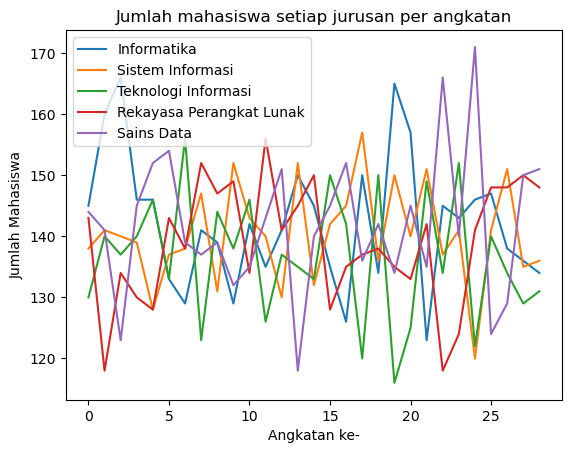

In [378]:
df.plot(kind='line')  # You can also use 'bar', 'barh', 'scatter', etc. depending on the type of graph you want.
plt.xlabel('Angkatan ke-')
plt.ylabel('Jumlah Mahasiswa')
plt.title('Jumlah mahasiswa setiap jurusan per angkatan')
plt.show()

In [379]:
dfeachYear
tahun_start = dfeachYear[0]['tahun'].iloc[0]
tahun_akhir = dfeachYear[-1]['tahun'].iloc[0]

In [380]:
pengeluaranTiapTahun = []
for year in range(len(dfeachYear)):
  pengeluaranTiapTahun.append(dfeachYear[year].groupby('tahun')['anggaran'].mean().to_list()[0])
  
dfPengeluaranTiapTahun = pd.DataFrame(pengeluaranTiapTahun, columns=['anggaran'])
tahun_angkatan = [i for i in range(tahun_start, tahun_akhir + 1)]
dfTahunAngkatan = pd.DataFrame(tahun_angkatan, columns=['tahun'])
result = pd.concat([dfTahunAngkatan, dfPengeluaranTiapTahun], axis=1)

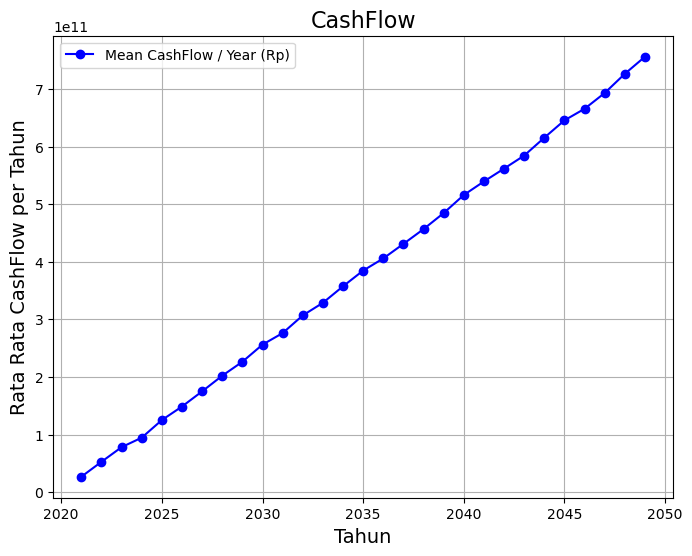

In [381]:
plt.figure(figsize=(8, 6))
plt.plot(result['tahun'], result['anggaran'], marker='o', linestyle='-', color='b', label='Mean CashFlow / Year (Rp)')

plt.title('CashFlow', fontsize=16)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Rata Rata CashFlow per Tahun', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()